# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
!pip install mlflow==2.19.0

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import mlflow
import mlflow.sklearn

import os
import logging



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Dimensi Dataset: (1599, 12)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Statistik Deskriptif:
       fixed acidity  volatile acidity  citric acid  re

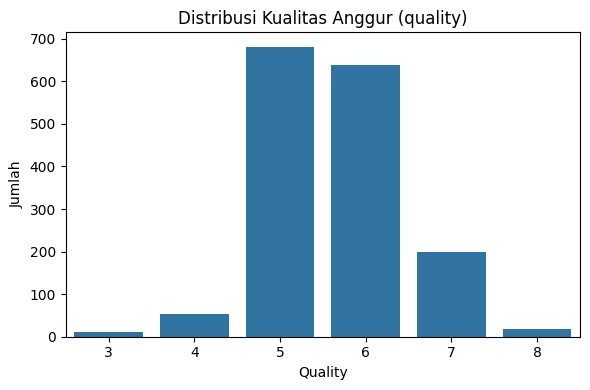

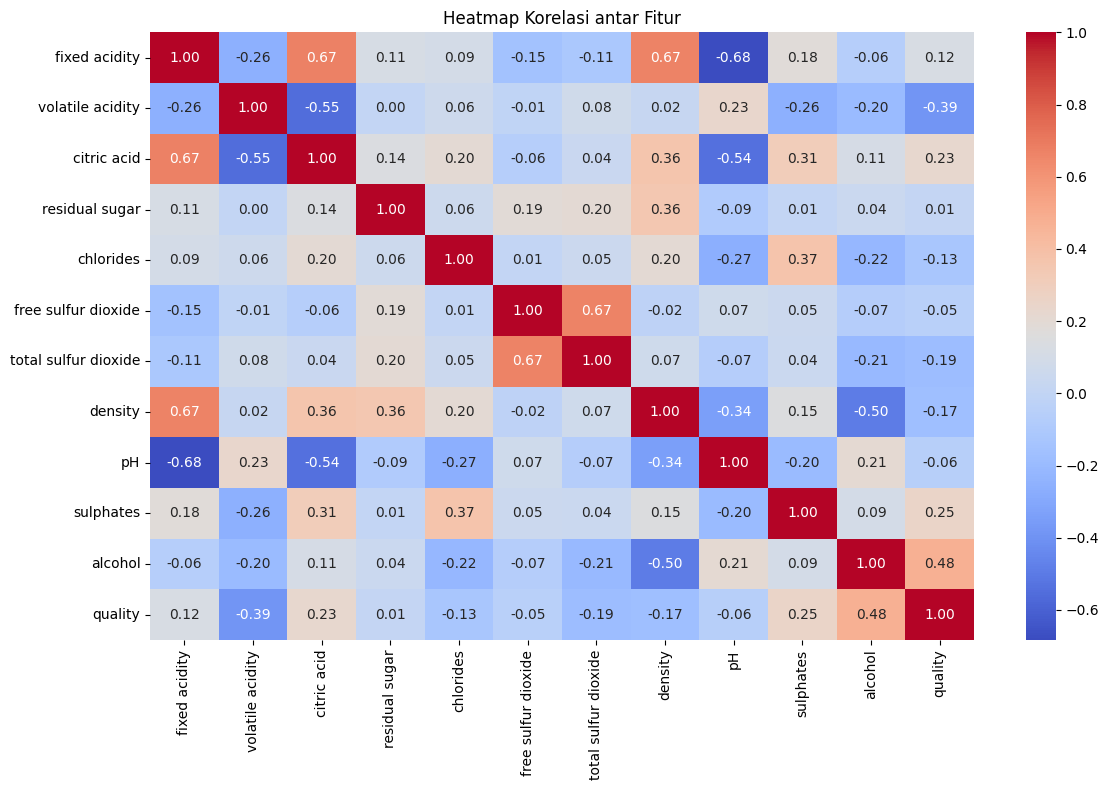

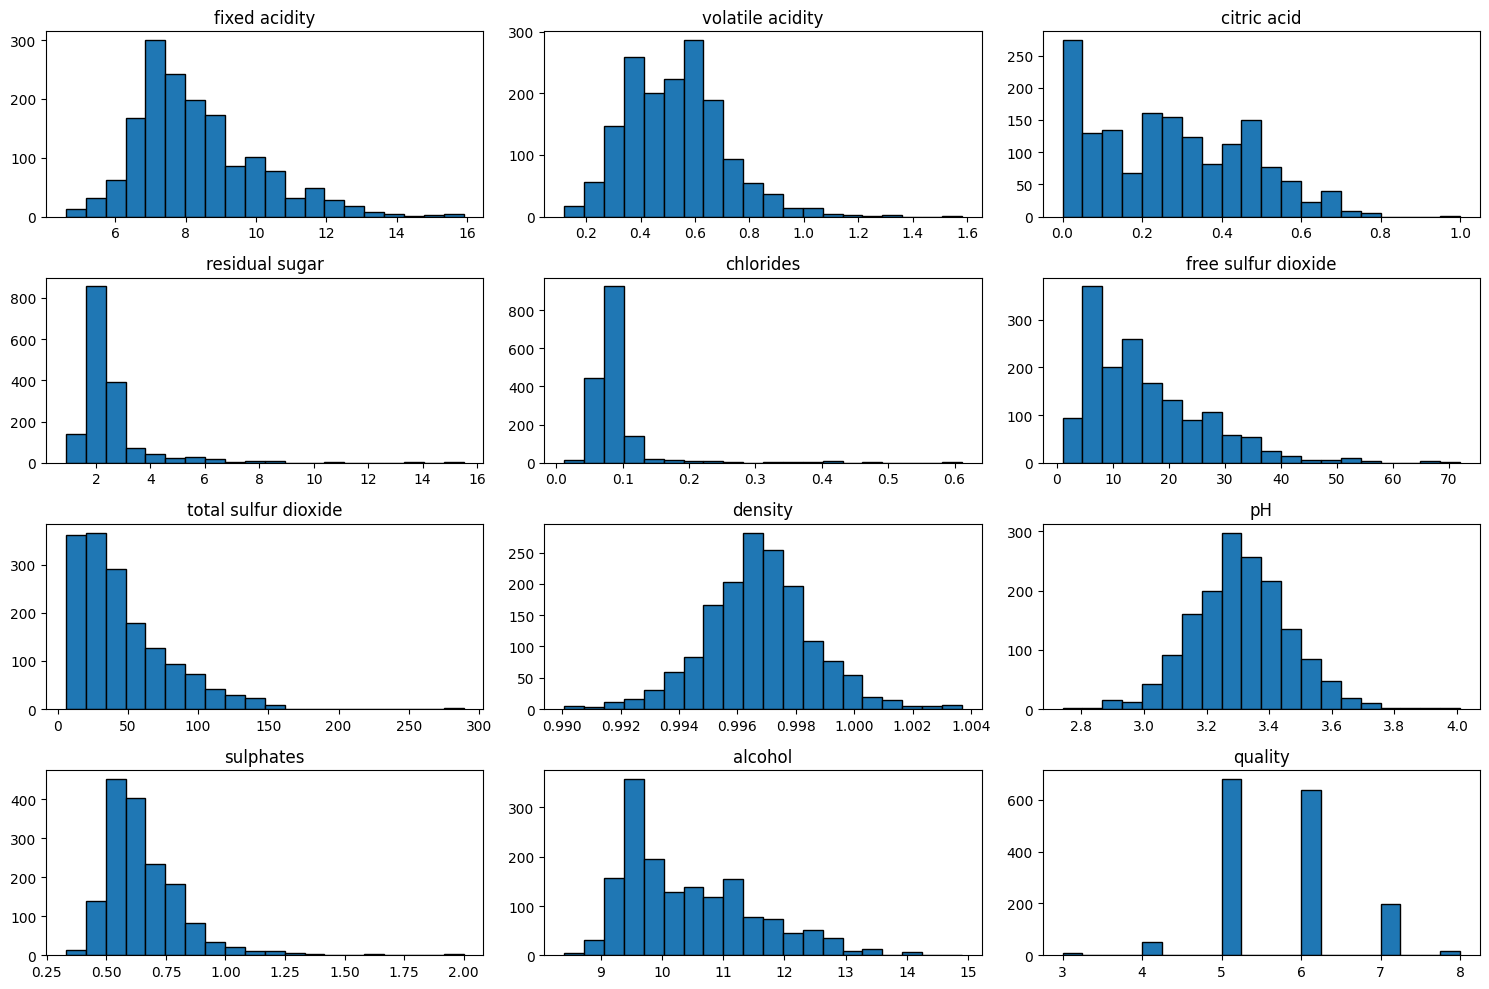

In [4]:

print("Dimensi Dataset:", df.shape)

print("\nInfo Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

print("\nDistribusi Nilai 'quality':")
print(df['quality'].value_counts().sort_index())

plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title("Distribusi Kualitas Anggur (quality)")
plt.xlabel("Quality")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur")
plt.tight_layout()
plt.show()

df.hist(bins=20, figsize=(15,10), grid=False, edgecolor='black')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Dimensi data setelah preprocessing: (1005, 12)

Statistik deskriptif setelah preprocessing:
        fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.005000e+03      1.005000e+03  1.005000e+03    1.005000e+03   
mean    8.484092e-17     -1.838220e-16  9.191100e-17    4.242046e-17   
std     1.000498e+00      1.000498e+00  1.000498e+00    1.000498e+00   
min    -2.082666e+00     -2.417668e+00 -1.374692e+00   -2.216385e+00   
25%    -7.245817e-01     -7.967699e-01 -9.339483e-01   -6.633701e-01   
50%    -2.492523e-01     -1.633741e-02 -5.246161e-02   -2.196517e-01   
75%     5.655981e-01      6.440286e-01  8.290250e-01    6.677852e-01   
max     2.806437e+00      2.925293e+00  2.647091e+00    3.219166e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.005000e+03         1.005000e+03          1.005000e+03  1.005000e+03   
mean  -5.090455e-16        -7.070077e-17         -5.656062e-17  1.470576e-15   
std    1.000498e+0

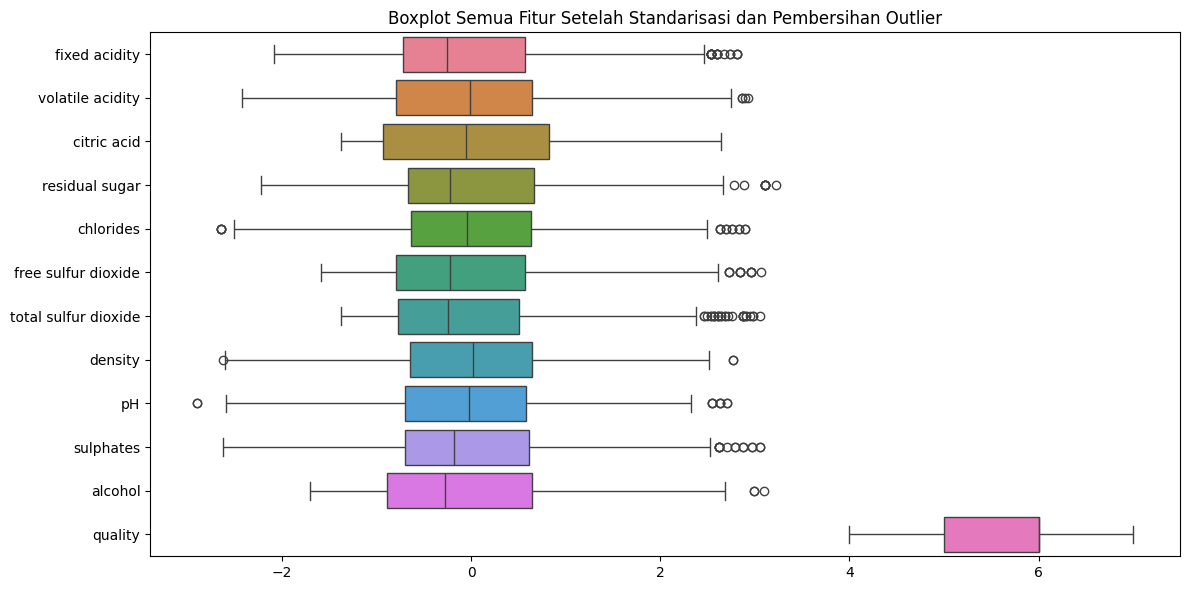

In [5]:

df.dropna(inplace=True)


df.drop_duplicates(inplace=True)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


X = df.drop('quality', axis=1)
y = df['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['quality'] = y.values

print("Dimensi data setelah preprocessing:", df_scaled.shape)
print("\nStatistik deskriptif setelah preprocessing:\n", df_scaled.describe())

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled, orient="h")
plt.title("Boxplot Semua Fitur Setelah Standarisasi dan Pembersihan Outlier")
plt.tight_layout()
plt.show()

In [6]:

df_scaled.to_csv('/content/winequality_red_preprocessed.csv', index=False)

print("Dataset berhasil disimpan sebagai 'winequality_red_preprocessed.csv'")


Dataset berhasil disimpan sebagai 'winequality_red_preprocessed.csv'


# **6. Fungsi Preprocessing Otomatis**

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess_wine_data(file_path):
    """
    Fungsi ini memuat data dari file_path, membersihkan data,
    mendeteksi dan menghapus outlier, serta menstandarkan fitur numerik.

    Args:
        file_path (str): Path ke file CSV.

    Returns:
        pd.DataFrame: DataFrame yang telah diproses dan siap digunakan untuk pelatihan model.
    """
    # 1. Load dataset
    df = pd.read_csv(file_path)

    # 2. Drop missing values
    df.dropna(inplace=True)

    # 3. Drop duplicates
    df.drop_duplicates(inplace=True)

    # 4. Outlier detection using IQR
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    # 5. Feature scaling
    X = df.drop('quality', axis=1)
    y = df['quality']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 6. Combine scaled features with target
    df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    df_scaled['quality'] = y.values

    return df_scaled


In [8]:
code = """
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

def preprocess_wine_data(file_path):
    \"""
    Fungsi ini memuat data dari file_path, membersihkan data,
    mendeteksi dan menghapus outlier, serta menstandarkan fitur numerik.

    Args:
        file_path (str): Path ke file CSV.

    Returns:
        pd.DataFrame: DataFrame yang telah diproses dan siap digunakan untuk pelatihan model.
    \"""
    # 1. Load dataset
    df = pd.read_csv(file_path)

    # 2. Drop missing values
    df.dropna(inplace=True)

    # 3. Drop duplicates
    df.drop_duplicates(inplace=True)

    # 4. Outlier detection using IQR
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    # 5. Feature scaling
    X = df.drop('quality', axis=1)
    y = df['quality']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 6. Combine scaled features with target
    df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    df_scaled['quality'] = y.values

    return df_scaled

if __name__ == "__main__":
    input_path = "namadataset_raw/winequality-red/winequality-red.csv"
    output_path = "namadataset_preprocessing/winequality-red-clean.csv"

    df_clean = preprocess_wine_data(input_path)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df_clean.to_csv(output_path, index=False)

    print(f"Preprocessing selesai. File disimpan di: {output_path}")
"""

with open("/content/automate_FebieElfaladonna.py", "w") as f:
    f.write(code)

print("File automate_FebieElfaladonna.py berhasil dibuat!")


File automate_FebieElfaladonna.py berhasil dibuat!


In [9]:
with open("/content/automate_FebieElfaladonna.py", "w") as f:
    f.write(code)


In [10]:
from automate_FebieElfaladonna import preprocess_wine_data

# Gunakan fungsi
df_ready = preprocess_wine_data("/content/winequality_red_preprocessed.csv")

# Cek hasil
df_ready.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.498311,1.072775,-1.372608,-0.640480,-0.130908,-0.439818,-0.274328,0.859625,1.460757,-0.590945,-0.996179,5
1,-0.203540,2.155294,-1.372608,1.003021,1.446554,1.233200,1.096384,0.208411,-1.028416,0.509393,-0.584981,5
2,-0.203540,1.433615,-1.144572,0.298663,1.016337,0.038187,0.556407,0.338653,-0.546640,0.234308,-0.584981,5
3,2.302012,-1.453102,1.819889,-0.640480,-0.202610,0.277190,0.805627,0.989868,-1.349599,-0.407555,-0.584981,6
4,-0.498311,0.832216,-1.372608,-0.875266,-0.202610,-0.200816,-0.025108,0.859625,1.460757,-0.590945,-0.996179,5
